In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import pylab as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from sklearn.decomposition import PCA
# plt.rcParams['figure.figsize'] = (20., 15.)
# plt.rcParams['font.size'] = 20

Importing the data.
We remove all the duplicates (when a couple year/country appears twice or more we take the mean)

In [4]:
data = pd.read_csv("data_source/all_data.csv")
data = data.groupby(['code', 'year'], as_index=False).mean().dropna(how='all')#
#index = pd.MultiIndex.from_tuples(list(zip(*[data['code'], data['year']])), names=['code', 'year'])
#data.index = index
data.set_index(['code', 'year'], inplace=True)
print "number of year/country points : ", len(data)

number of year/country points :  19491


Group of variable w.r.t their origin

In [5]:
origins = np.array([item.split('_')[-1] for item in data.keys()])
sources = set(origins)
origins = {source: np.array(data.keys())[origins==source] for source in sources}

## Fullness of the dataset

Fullness of data per variable

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19491 entries, (ABW, 1960.0) to (ZWE, 2014.0)
Data columns (total 74 columns):
D1_WB                         1255 non-null float64
D9_WB                         1255 non-null float64
QU1_WB                        1255 non-null float64
QU2_WB                        1255 non-null float64
QU3_WB                        1255 non-null float64
QU4_WB                        1255 non-null float64
QU5_WB                        1255 non-null float64
GDP_MP_WB                     8378 non-null float64
GDP_growth_WB                 8397 non-null float64
GDP_PC_WB                     8745 non-null float64
gov_consumption_WB            7666 non-null float64
inflation_WB                  6747 non-null float64
fertility_WB                  10430 non-null float64
savings_WB                    5303 non-null float64
investments_WB                7587 non-null float64
GNI_PC_WB                     7690 non-null float64
gini_DS                       693 non-

## Fullness of data per country

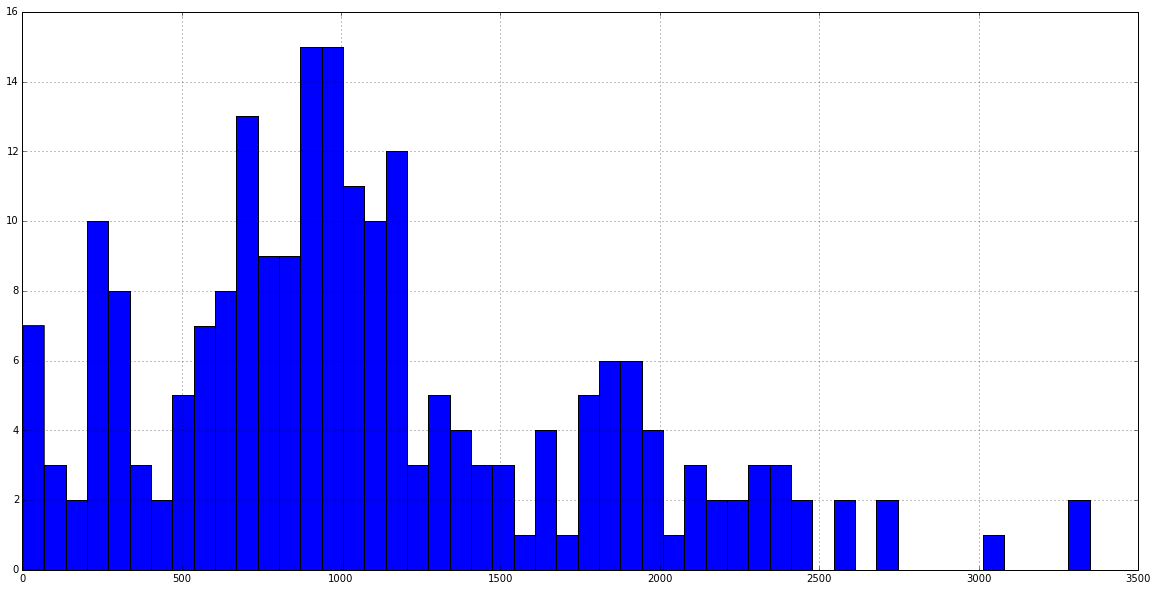

In [7]:
data.notnull().sum(level='code').sum(axis=1).hist(bins=50, figsize=(20,10))

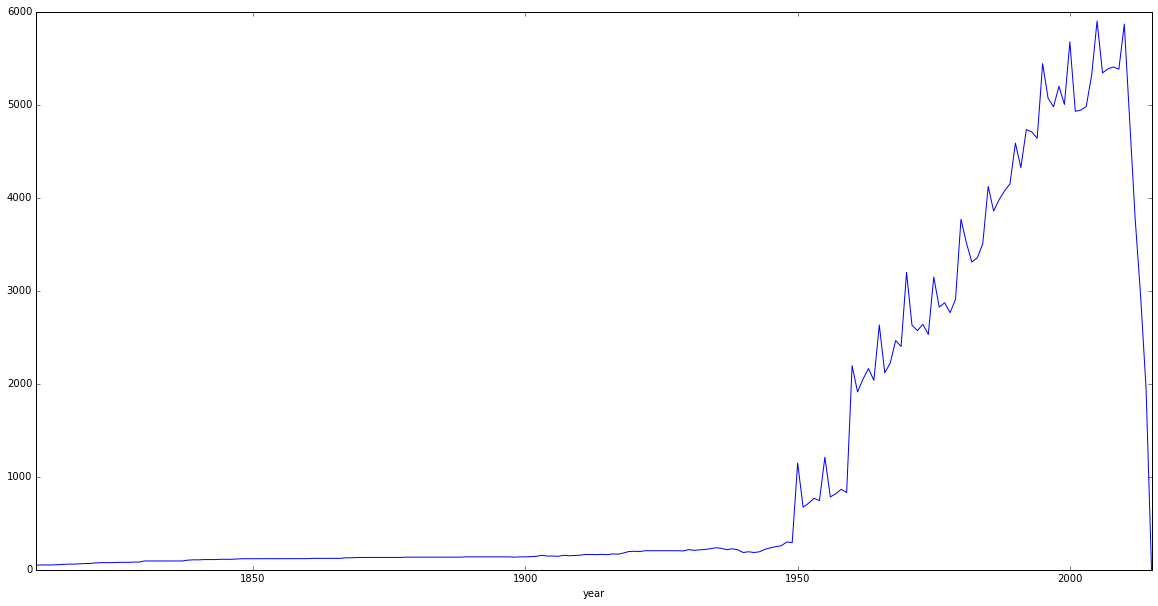

In [8]:
data.notnull().sum(level='year').sum(axis=1).plot(figsize=(20,10))

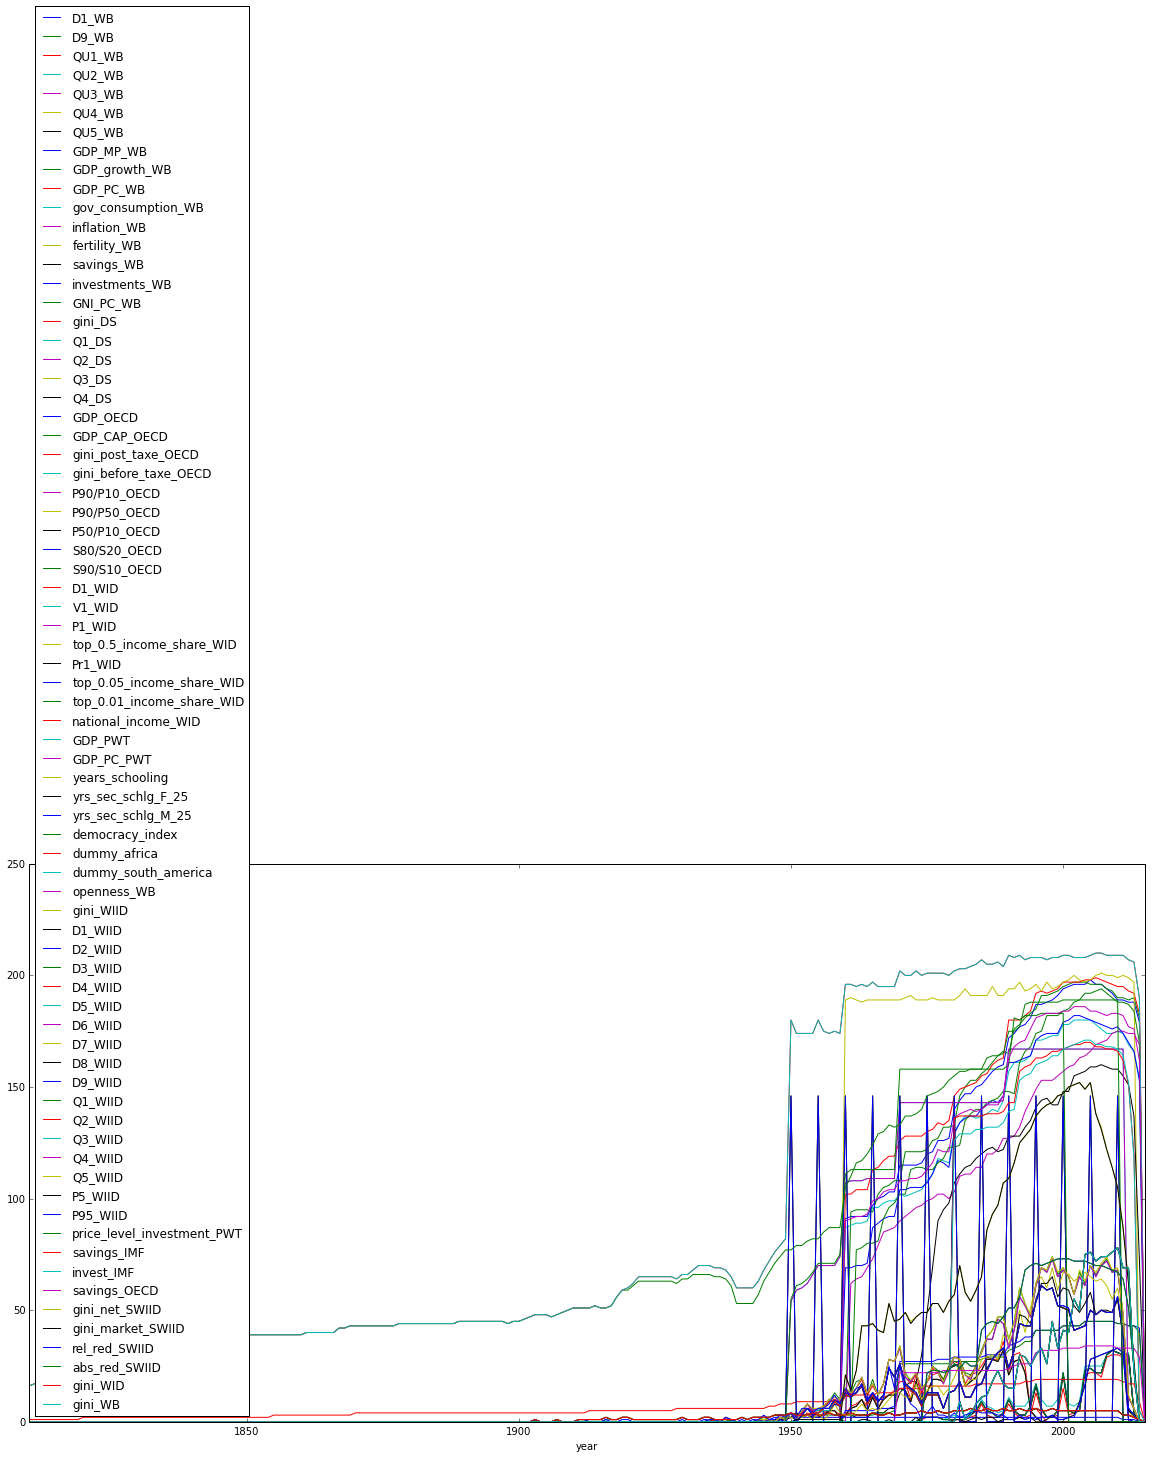

In [9]:
data.notnull().sum(level='year').plot(figsize=(20,10))

## Correlation between variables

In [10]:
country = 'DEU'

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


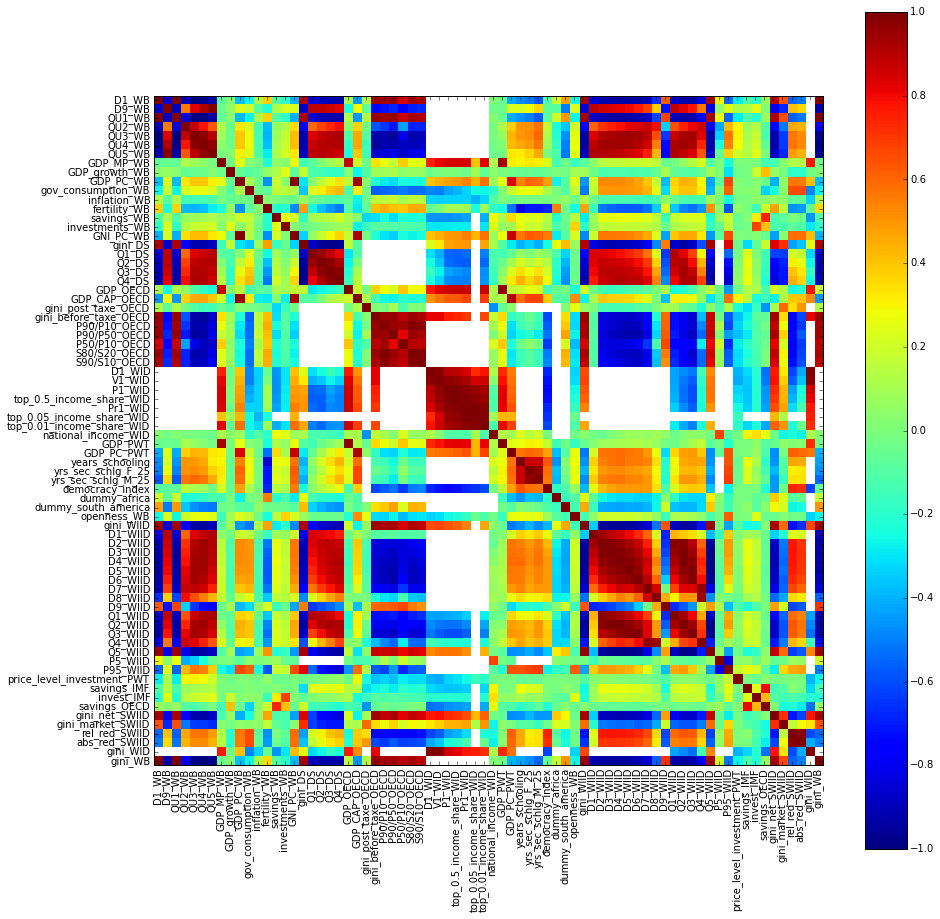

In [11]:
correlations = data.corr(min_periods=100)
fig = plt.figure(figsize=(15,15))
norm = plt.cm.colors.Normalize(vmax=1, vmin=-1)
plt.imshow(correlations, interpolation='nearest', norm=norm)
plt.xticks(range(0, len(data.columns)), data.columns, rotation='vertical')
plt.yticks(range(0, len(data.columns)), data.columns, rotation='horizontal')
plt.colorbar()
plt.savefig("graphs/correlations_variables.png")

Blank cells whan crossing with dummy_africa because there are no data for african countries in the OECD and WID databases. 

## Dataviz

Selects randomly a country and simply plots all the data. 

Country :  USA


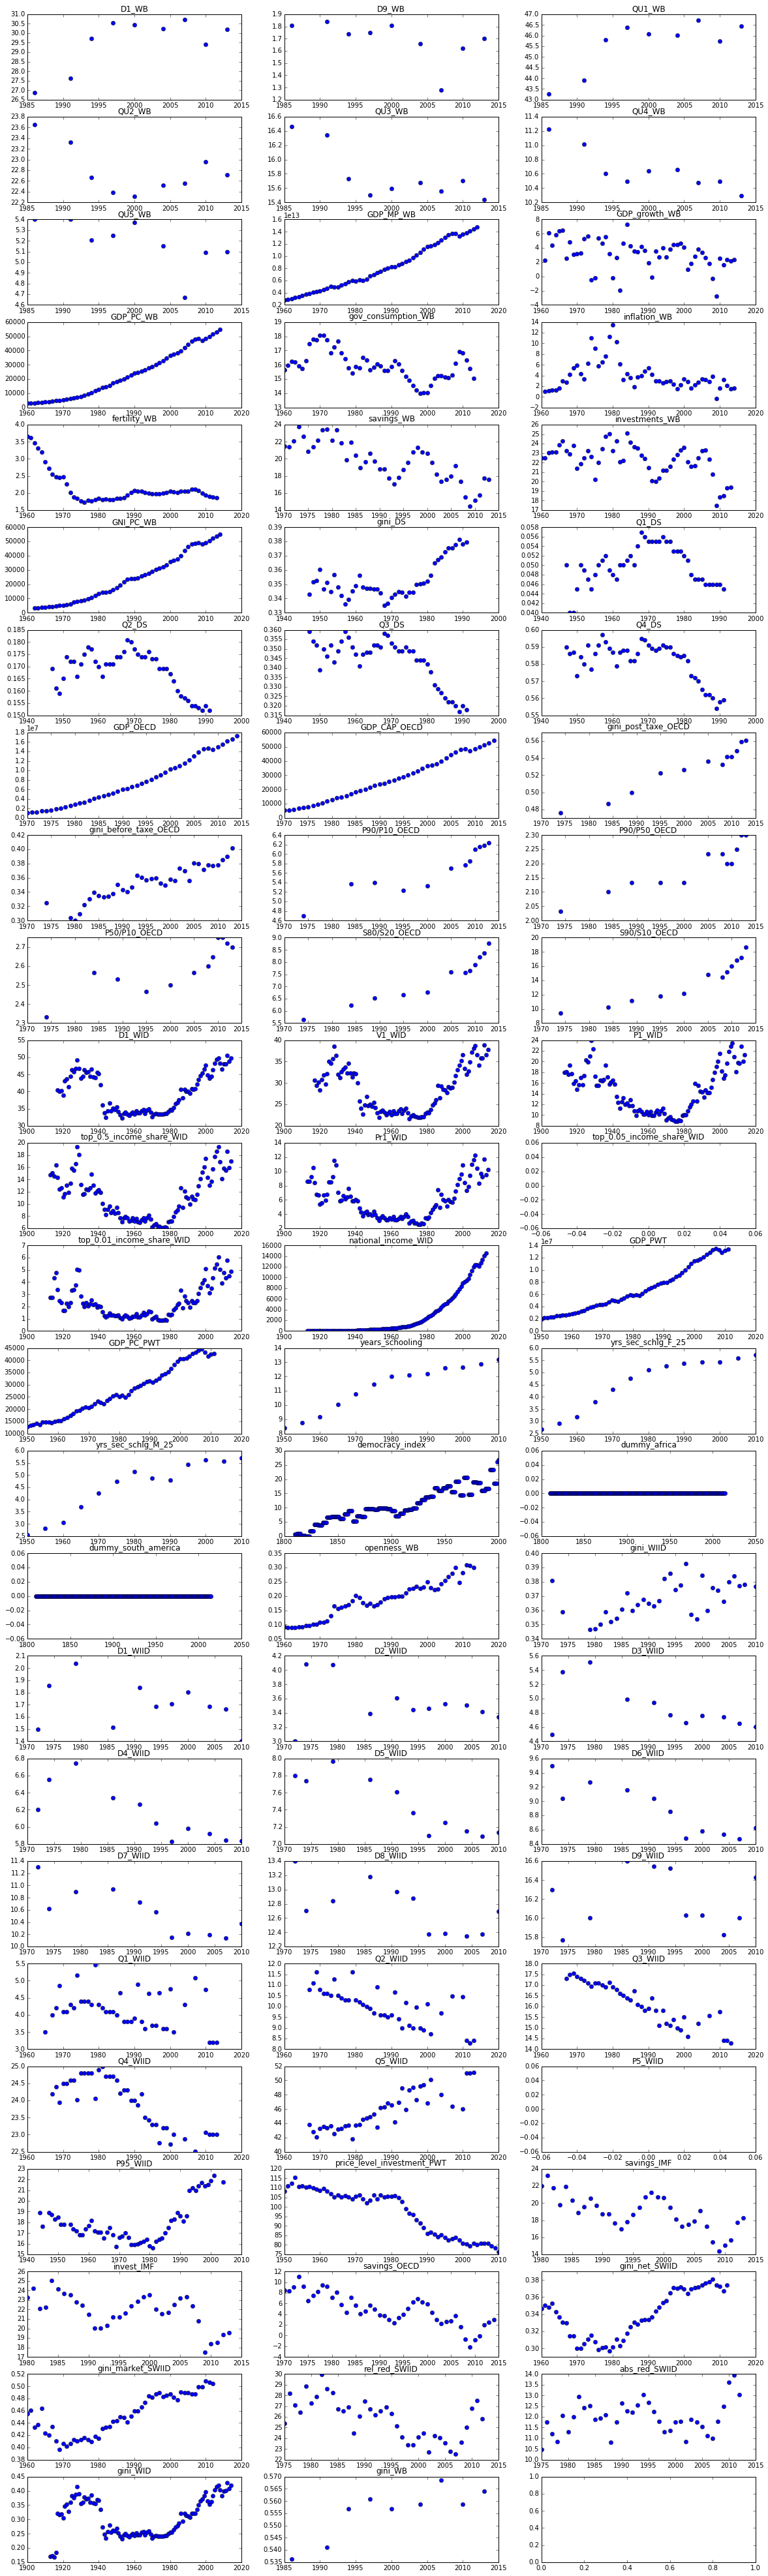

In [12]:
country = 'USA' #np.random.choice(data.index.levels[0])
print "Country : ", country
selection = data.loc[country, :]
f, axarr = plt.subplots(25, 3, figsize=(20,70))
x = selection.index.values
for n, var in enumerate(data.keys()):
    i,j = n/3, n%3
    y = selection[var]
    axarr[i, j].plot(x, y, 'o')
    axarr[i, j].set_title(var)

# Inequality data

In [13]:
ineq_variables = ["top_0.01_income_share_WID", "top_0.05_income_share_WID", "Pr1_WID", "top_0.5_income_share_WID", 
                  "P1_WID", "V1_WID", "P5_WIID", "D1_WID", "D1_WIID", "D1_WB", "QU1_WB", "Q1_WIID", "D2_WIID", "D3_WIID", "D4_WIID",
                   "QU2_WB", "Q2_WIID", "D5_WIID", "D6_WIID", "QU3_WB", "Q3_WIID", "D7_WIID", "D8_WIID", "QU4_WB", "Q4_WIID", "D9_WIID", "D9_WB", "QU5_WB", 
                  "Q1_DS", "Q2_DS", "Q3_DS", "Q4_DS", "P95_WIID", 
                  "P90/P10_OECD", "P90/P50_OECD", "P50/P10_OECD", "S80/S20_OECD", "S90/S10_OECD", 
                  "gini_WID", "gini_WB", "gini_post_taxe_OECD", 
                  "gini_before_taxe_OECD", "gini_DS", "gini_WIID"]
ineq = data[ineq_variables]

<matplotlib.colorbar.Colorbar instance at 0x7fdf4c0f61b8>

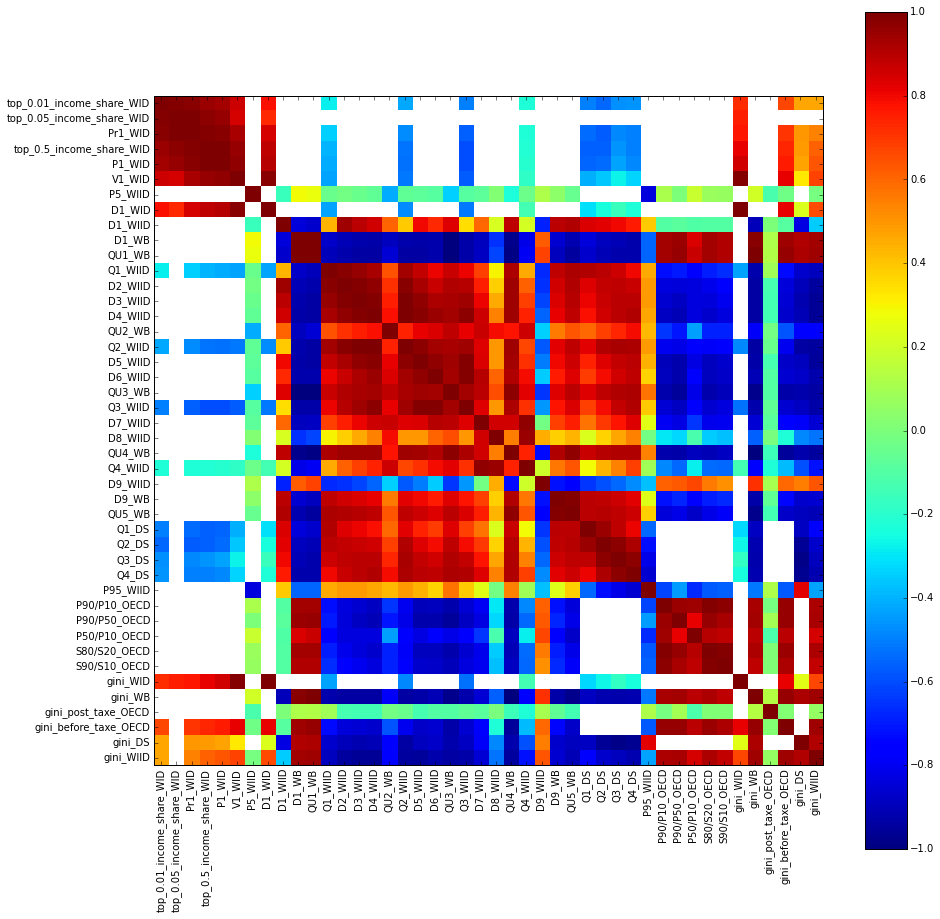

In [14]:
ineq = ineq.sort_index()
correlations = ineq.corr(min_periods=100)
fig = plt.figure(figsize=(15,15))
norm = plt.cm.colors.Normalize(vmax=1, vmin=-1)
plt.imshow(correlations, interpolation='nearest', norm=norm)
plt.xticks(range(0, len(ineq.columns)), ineq.columns, rotation='vertical')
plt.yticks(range(0, len(ineq.columns)), ineq.columns, rotation='horizontal')
plt.colorbar()
# plt.savefig("graphs/correlations_inequality_variables.png")

# Income data

In [15]:
inc_var = ["GDP_MP_WB", "GDP_OECD", "GDP_PWT", "national_income_WID", 
           "GDP_PC_WB", "GDP_PC_PWT", "GDP_CAP_OECD", "GDP_growth_WB"]
inc = data[inc_var]

<matplotlib.colorbar.Colorbar instance at 0x7fdf47f74dd0>

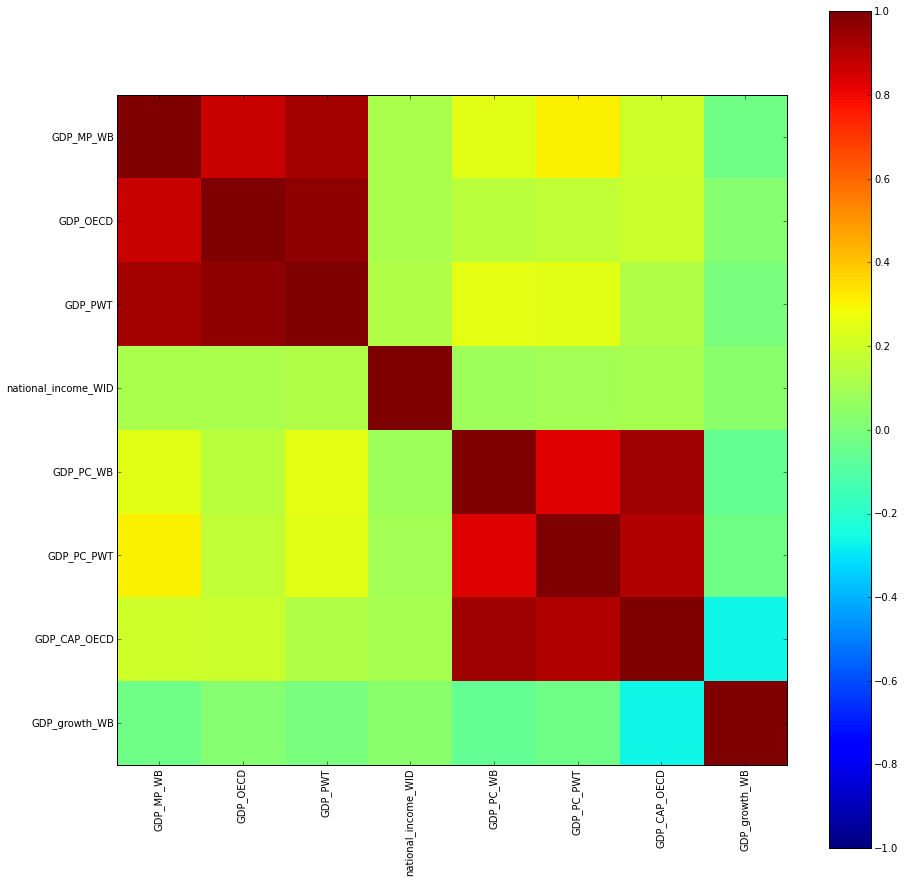

In [16]:
inc = inc.sort_index()
correlations = inc.corr(min_periods=100)
fig = plt.figure(figsize=(15,15))
norm = plt.cm.colors.Normalize(vmax=1, vmin=-1)
plt.imshow(correlations, interpolation='nearest', norm=norm)
plt.xticks(range(0, len(inc.columns)), inc.columns, rotation='vertical')
plt.yticks(range(0, len(inc.columns)), inc.columns, rotation='horizontal')
plt.colorbar()
# plt.savefig("graphs/correlations_income_variables.png")

# Test a Piketty model to explain growth

In [17]:
var = data[['openness_WB', 'GDP_PC_WB', "GDP_growth_WB"]].dropna(how='any')
var['var1'] = ( - var['GDP_PC_WB'].apply(np.log) + var['GDP_PC_WB'].groupby(level=1).max().apply(np.log)) * var['openness_WB']
print var.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7498 entries, (ABW, 1995.0) to (ZWE, 2014.0)
Data columns (total 4 columns):
openness_WB      7498 non-null float64
GDP_PC_WB        7498 non-null float64
GDP_growth_WB    7498 non-null float64
var1             7498 non-null float64
dtypes: float64(4)
memory usage: 292.9+ KB
None


In [18]:
var[['var1', 'GDP_growth_WB']].corr()

,var1,GDP_growth_WB
var1,1.000000,0.108157
GDP_growth_WB,0.108157,1.000000


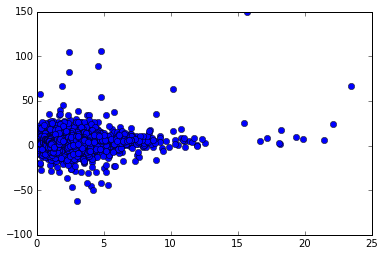

In [19]:
plt.plot(var['var1'], var['GDP_growth_WB'], 'o')

# Relation savings growth

In [85]:
selection = data[['savings_IMF', 'GDP_growth_WB']].dropna(how='any')
selection.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4971 entries, (AFG, 2003.0) to (ZWE, 2012.0)
Data columns (total 2 columns):
savings_IMF      4971 non-null float64
GDP_growth_WB    4971 non-null float64
dtypes: float64(2)
memory usage: 116.5+ KB


In [87]:
selection.corr()

,savings_IMF,GDP_growth_WB
savings_IMF,1.000000,0.151429
GDP_growth_WB,0.151429,1.000000


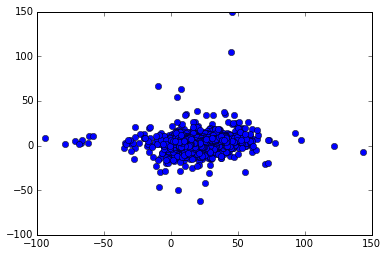

In [86]:
plt.plot(selection['savings_IMF'], selection['GDP_growth_WB'], 'o')

# Relation investment growth

In [88]:
selection = data[['invest_IMF', 'GDP_growth_WB']].dropna(how='any')
selection.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4844 entries, (AFG, 2003.0) to (ZWE, 2012.0)
Data columns (total 2 columns):
invest_IMF       4844 non-null float64
GDP_growth_WB    4844 non-null float64
dtypes: float64(2)
memory usage: 113.5+ KB


In [89]:
selection.corr()

,invest_IMF,GDP_growth_WB
invest_IMF,1.000000,0.192438
GDP_growth_WB,0.192438,1.000000


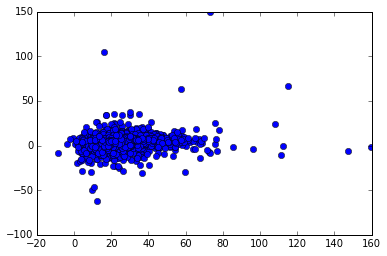

In [91]:
plt.plot(selection['invest_IMF'], selection['GDP_growth_WB'], 'o')

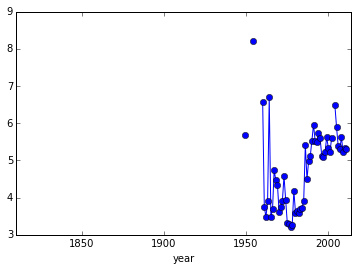

In [25]:
(data["Q5_WIID"] / data["Q1_WIID"]).loc['GBR'].plot(marker='o')

In [28]:
rich_countries = ["Luxembourg", "Switzerland", "Qatar", "Norway", "United States", "Singapore", "Australia", 
 "Denmark", "Iceland", "San Marino", "Sweden", "Ireland", "Netherlands", "United Kingdom", 
 "Canada", "Austria", "Finland", "Hong Kong", "Germany", "Belgium", "France", "New Zealand", 
 "Israel", "United Arab Emirates", "Japan", "Kuwait", "Italy", "Brunei", "South Korea", 
 "Spain", "Bahamas", "Bahrain", "Taiwan", "Malta", "Cyprus", "Slovenia", "Trinidad and Tobago", 
 "Saudi Arabia", "Portugal", "Greece", "Estonia", "Czech Republic", "Uruguay", "Barbados", 
 "Slovakia", "Oman", "Saint Kitts and Nevis", "Palau", "Seychelles", "Antigua and Barbuda", "Lithuania"]
code_country_dict = pd.read_csv("data_source/country_code_list.csv")
rich_codes = code_country_dict.query("country in " + str(rich_countries))['code'].values.tolist()

In [32]:
twenty_obs_list = data.groupby(level=0).size()[data.groupby(level=0).size() >= 20].index.tolist()
keep_list = list(set(twenty_obs_list) & set(rich_codes))
data[['Q1_WIID', "Q5_WIID"]].query("code in " + str(keep_list)).info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5558 entries, (ARE, 1950.0) to (URY, 2014.0)
Data columns (total 2 columns):
Q1_WIID    860 non-null float64
Q5_WIID    874 non-null float64
dtypes: float64(2)
memory usage: 130.3+ KB
